In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

In [2]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(256),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Activation('softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 activation_2 (Activation)   (None, 128)               0

In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
history = model.fit(x_train, y_train, epochs=25)

Epoch 1/25
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2110 - accuracy: 0.9367
Epoch 2/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0930 - accuracy: 0.9716
Epoch 3/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0647 - accuracy: 0.9804
Epoch 4/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0527 - accuracy: 0.9840
Epoch 5/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0417 - accuracy: 0.9872
Epoch 6/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0383 - accuracy: 0.9885
Epoch 7/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0314 - accuracy: 0.9902
Epoch 8/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0268 - accuracy: 0.9918
Epoch 9/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0256 - accuracy: 0.9922
Epoch 10/25
1875/1875 [==============================] - 11s 6ms/step - l

In [6]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1355 - accuracy: 0.9816


[0.1355050951242447, 0.9815999865531921]

dict_keys(['loss', 'accuracy'])


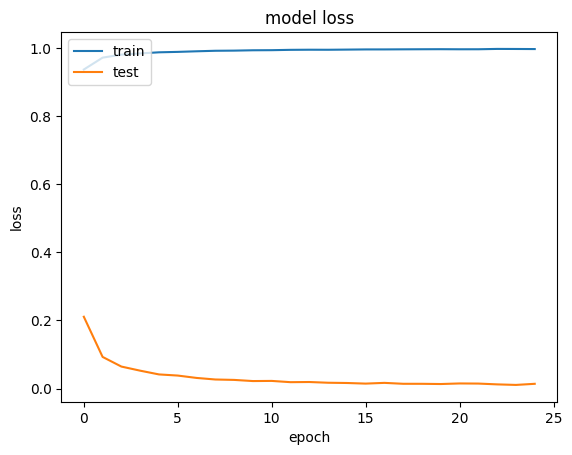

In [7]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()